### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 6

# Building Decision Tree in Python:

## Importing Libraries

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.metrics import classification_report

## Loading the DataSet:

- Using Iris example Dataset from sklearn

In [140]:
from sklearn.datasets import load_iris
iris_data = load_iris()

# load the dataset into a pandas dataframe
data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
data['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# preview the data
print(data.shape)

# check for missing values
print(data.isnull().sum())

data.head()

(150, 5)
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Splitting into Training and Test Sets

In [141]:
X = data.drop('species', axis=1)
y = data['species']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Scaling the data !!!! NO Need TODO !!!!!
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(X_train)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

## Training the Decision Tree Model

In [142]:
# initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=69)

# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=69)

### Plotting the decision tree

- You can also display an image of the tree after training. Use the `tree.plot_tree()` function to display 
the splits, feature names, and decisions. This makes it easy to see how decisions are being made 
at each step

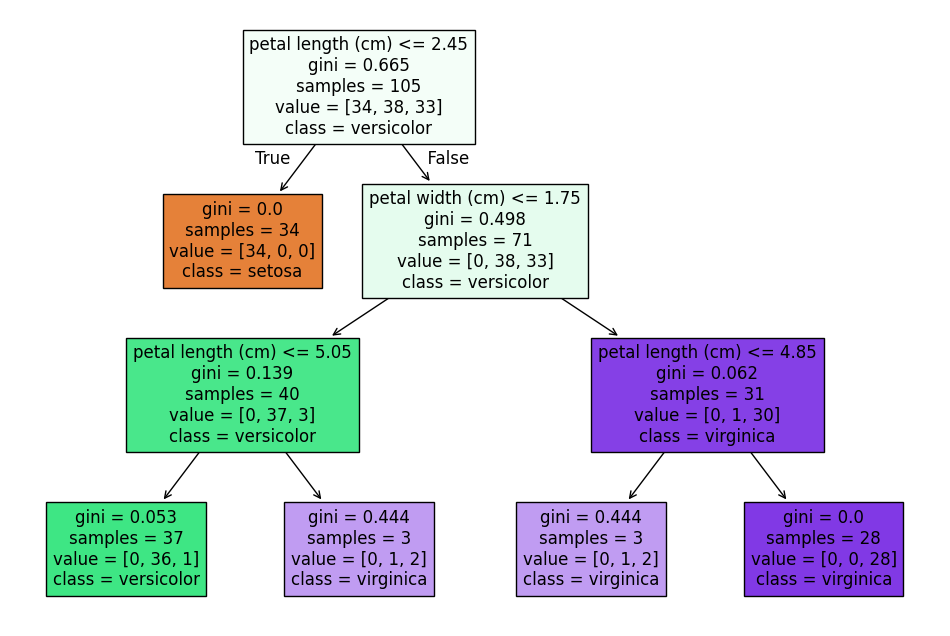

In [143]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=iris_data.feature_names, class_names=iris_data.target_names, filled=True)
class_names = iris_data.target_names
plt.show()

## Making Predictions

In [144]:
# Make predictions
y_pred = clf.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%


## Interpreting the tree

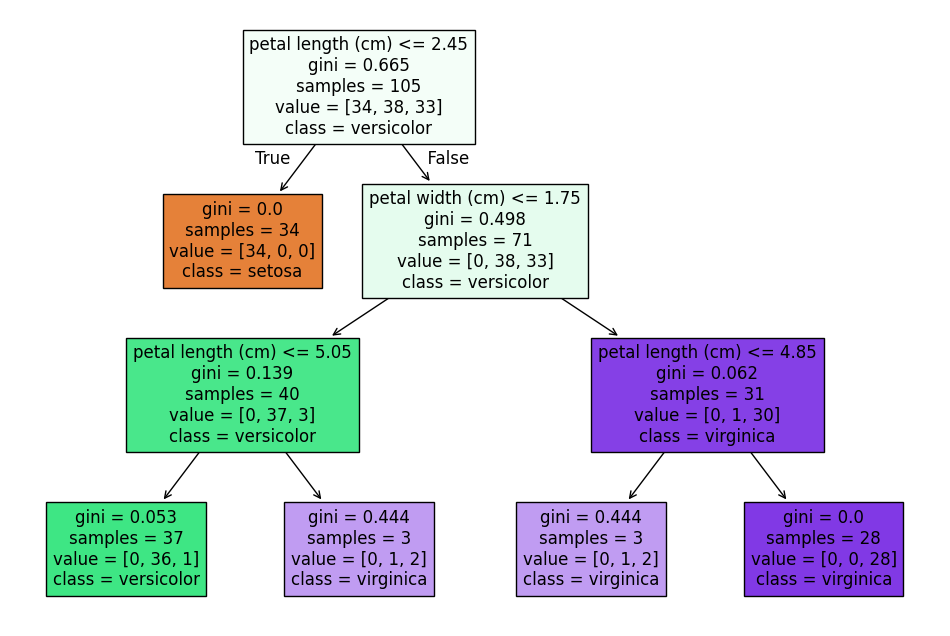

In [145]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
    filled=True,
)
class_names = iris_data.target_names
plt.show()

### Explanation

We will make our conclusions of the following questions by using the plotted decision tree:

- Why does the tree split on "petal length" first instead of "sepal width"?
    - The first split is on petal length, which typically has more discriminative power in separating iris species compared to features like sepal width. The tree has found that petal length creates a cleaner separation between classes (lower Gini impurity) at this point.

- What happens to the predictions if we restrict the tree to only 2 levels?
    - If we restricted the tree to only two levels, it would make fewer splits and therefore might not capture all the nuances in the data. The tree would likely make more errors in classifying the species. In this case, we can see the deeper splits help to separate Versicolor and Virginica more clearly based on petal length and width.
    - The accuracy may also decrease.
    - we can also check by plotting as follows

Accuracy: 95.56%


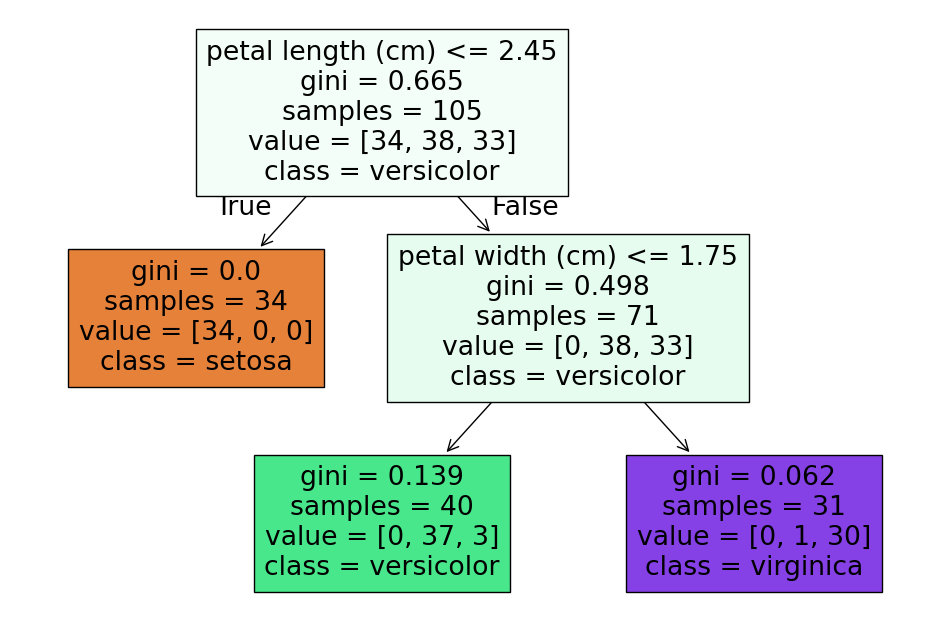

In [146]:
# initialize the DecisionTreeClassifier
clf_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=69)

# fit the model
clf_depth_2.fit(X_train, y_train)

# Make predictions
y_pred = clf_depth_2.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf_depth_2,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
    filled=True,
)
class_names = iris_data.target_names
plt.show()

# Detecting Overfitting

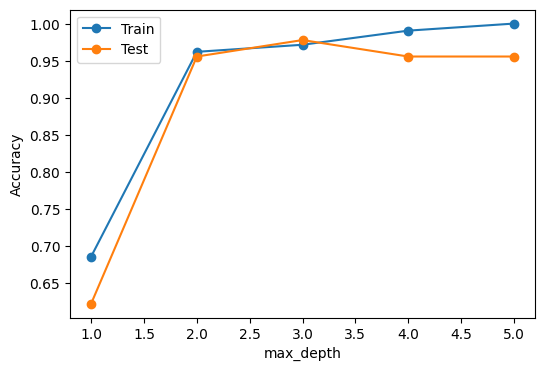

In [147]:
# Detecting overfitting
train_accuracy = []
test_accuracy = []

for depth in range(1, 6):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=69)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), train_accuracy, marker='o', label='Train')
plt.plot(range(1, 6), test_accuracy, marker='o', label='Test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- From the figure we can see that optimal depth can be 3-4 but can prefer 4 as it gives sweet spot

# Pruning

## Pre-pruning (Early Stopping):
- Stops the tree from growing beyond a certain depth. You can set 
parameters like max_depth or min_samples_split to control how deep or complex the tree gets.

Accuracy: 97.78%


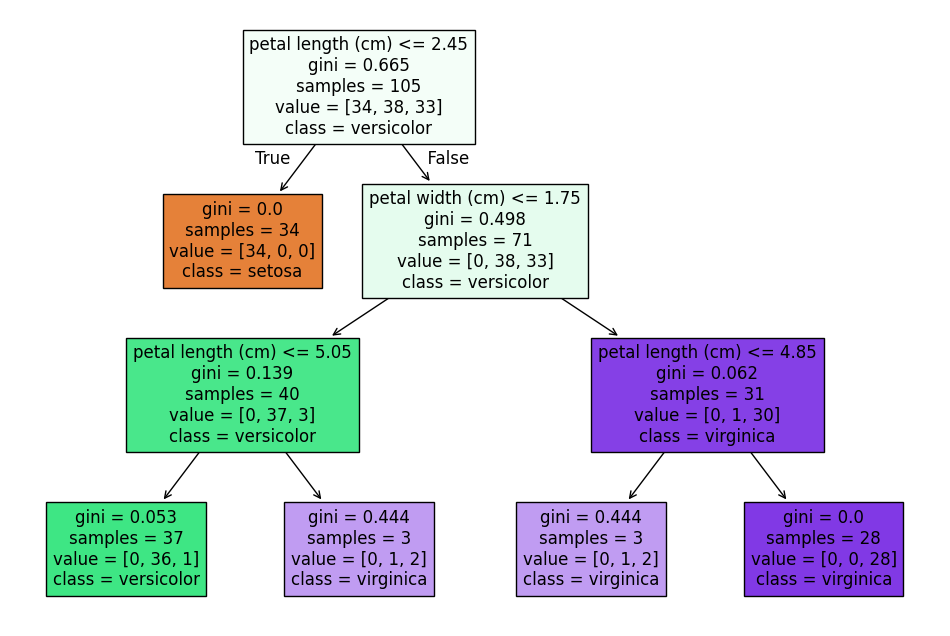

In [148]:
clf_pre_prune = DecisionTreeClassifier(max_depth=3, min_samples_split=4,  random_state=69)
clf_pre_prune.fit(X_train, y_train)

# Make predictions
y_pred = clf_pre_prune.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf_pre_prune,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
    filled=True,
)
class_names = iris_data.target_names
plt.show()

## Post-pruning
- Involves growing the tree fully and then cutting back the branches that don’t 
improve the model’s performance. In scikit-learn, this is done by setting the cost complexity 
pruning parameter, ccp_alpha

Accuracy: 95.56%


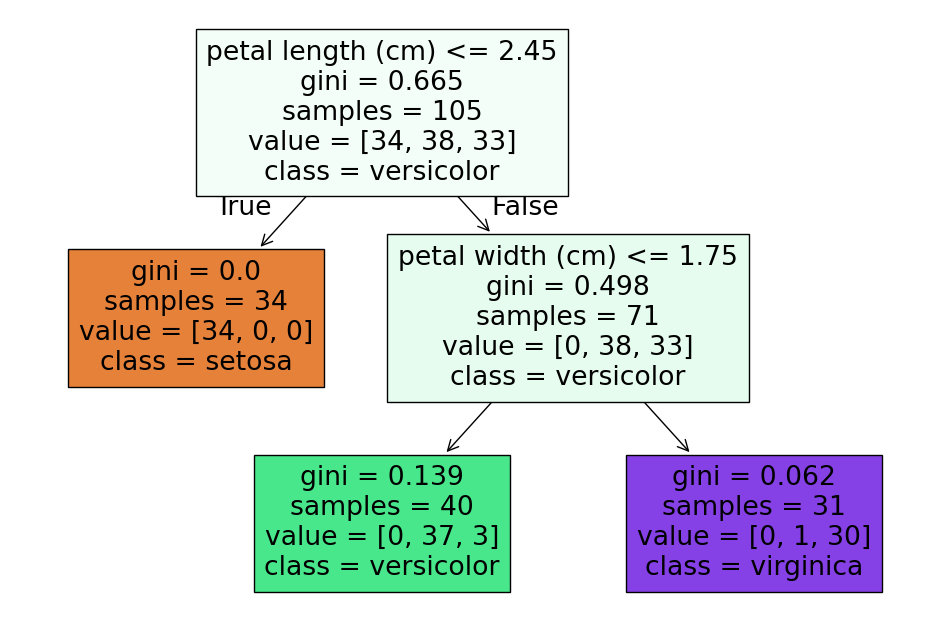

In [149]:
clf_post_prune = DecisionTreeClassifier(
    max_depth=3, min_samples_split=4, random_state=69, ccp_alpha=0.2
)
clf_post_prune.fit(X_train, y_train)

# Make predictions
y_pred = clf_post_prune.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf_post_prune,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
    filled=True,
)
class_names = iris_data.target_names
plt.show()

# Mini Challenge

## Loading Dataset

In [150]:
# %pip install kaggle

### Downloading

In [151]:
!kaggle competitions download -c titanic

### Extracting Zip, Loading data and Displaying

In [152]:
# Extract zip file
import zipfile
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('titanic')

# Load the data
titanic_train_data = pd.read_csv('titanic/train.csv')
titanic_test_data = pd.read_csv('titanic/test.csv')

# Preview the data
print(titanic_train_data.shape)
print(titanic_test_data.shape)

print(titanic_train_data.isnull().sum())
print(titanic_test_data.isnull().sum())

print(titanic_train_data.head())
print(titanic_test_data.head())

(891, 12)
(418, 11)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0   

## Cleaning Dataset

### Dropping Irrelevant Columns
- We drop Name, Ticket, Cabin and PassengerId columns as they won't have as much of an impact on our results

In [153]:
titanic_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Filling Missing Null data in Columns

#### Embarked and Fare Column
- Embarked and Fare have 2 and 1 missing or null values so `<1%` of rows so dropping the rows wont have as much effect on data.

#### Age Column
- The Age Column has missing or null values 177 and 86 rows for train and test data respectively.
- And upon seeing the shape of this data we can see we have 891 rows of train data and 418 rows of test data so dropping the rows with missing value will noticibly effect our dataset as null value constitute 20% and 21% of our train and test data respectively.
- We will use mean imputation as it will help us fill in the missing values to better our result.

In [154]:
# check for missing values
print(titanic_train_data.isnull().sum())
print(titanic_test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [155]:
print(titanic_train_data.shape)
print(titanic_test_data.shape)

# print number of missing values in Age column
print(titanic_train_data['Age'].isnull().sum())
print(titanic_test_data['Age'].isnull().sum())

(891, 9)
(418, 8)
177
86


In [156]:
# Fill missing values in Age Column according to the median, gender and Pclass

titanic_train_data["Age"] = (
    titanic_train_data.groupby(["Sex"])["Age"]
    .apply(lambda x: x.fillna(x.median()))
    .values
)

titanic_test_data["Age"] = (
    titanic_test_data.groupby(["Sex"])["Age"]
    .apply(lambda x: x.fillna(x.median()))
    .values
)

# Drop rows with missing values
titanic_train_data.dropna(inplace=True)
titanic_test_data.dropna(inplace=True)

In [157]:
# check for missing values
print(titanic_train_data.isnull().sum())
print(titanic_test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [158]:
print(titanic_train_data.describe())
print(titanic_test_data.describe())

       PassengerId    Survived      Pclass        Age       SibSp       Parch  \
count   889.000000  889.000000  889.000000  889.00000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.40739    0.524184    0.382452   
std     256.998173    0.486260    0.834700   13.01113    1.103705    0.806761   
min       1.000000    0.000000    1.000000    0.42000    0.000000    0.000000   
25%     224.000000    0.000000    2.000000   22.00000    0.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.00000    0.000000    0.000000   
75%     668.000000    1.000000    3.000000   35.00000    1.000000    0.000000   
max     891.000000    1.000000    3.000000   80.00000    8.000000    6.000000   

             Fare  
count  889.000000  
mean    32.096681  
std     49.697504  
min      0.000000  
25%      7.895800  
50%     14.454200  
75%     31.000000  
max    512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   417

## Feature Engineering

### One Hot Encoding Binary and Categorical Columns

In [159]:
# One Hot Encoding Binary and Categorical Columns
titanic_train_data = pd.get_dummies(titanic_train_data, columns=["Sex", "Embarked"])
titanic_test_data = pd.get_dummies(titanic_test_data, columns=["Sex", "Embarked"])

print(titanic_train_data.shape)
print(titanic_test_data.shape)

(889, 12)
(417, 11)


### Correlation Matrix

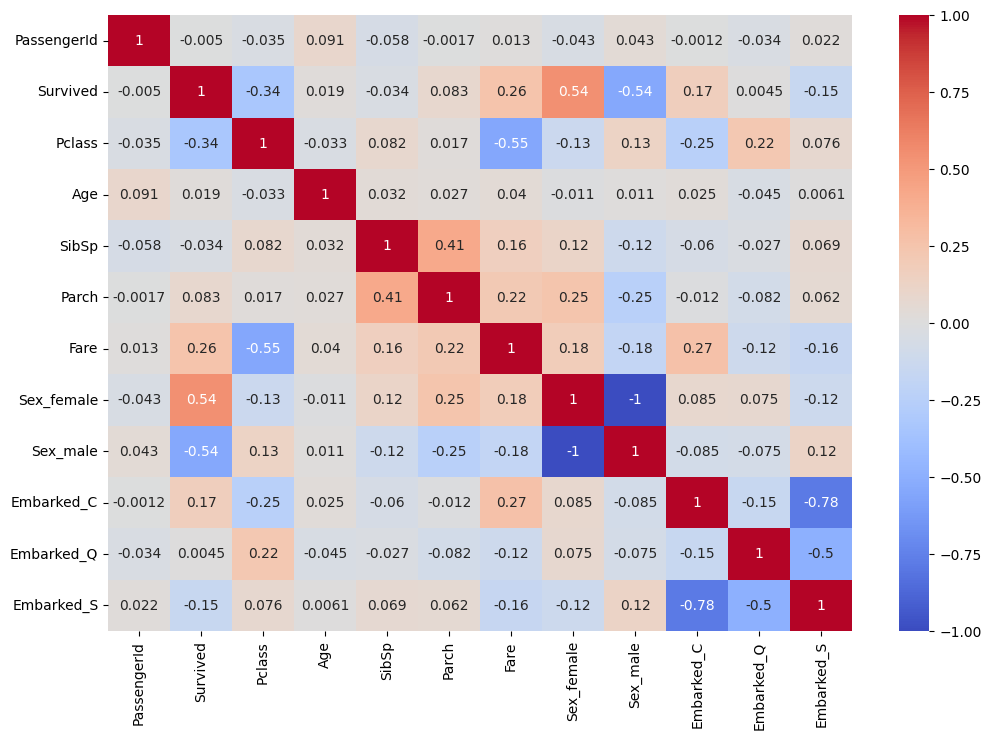

In [160]:
# Correlation matrix
corr_data = titanic_train_data.copy()
corr_data = corr_data.drop(columns=['PassengerId'], axis=1, inplace=True)
corr_matrix = titanic_train_data.corr()
plt.figure(figsize=(12, 8))
heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Training 

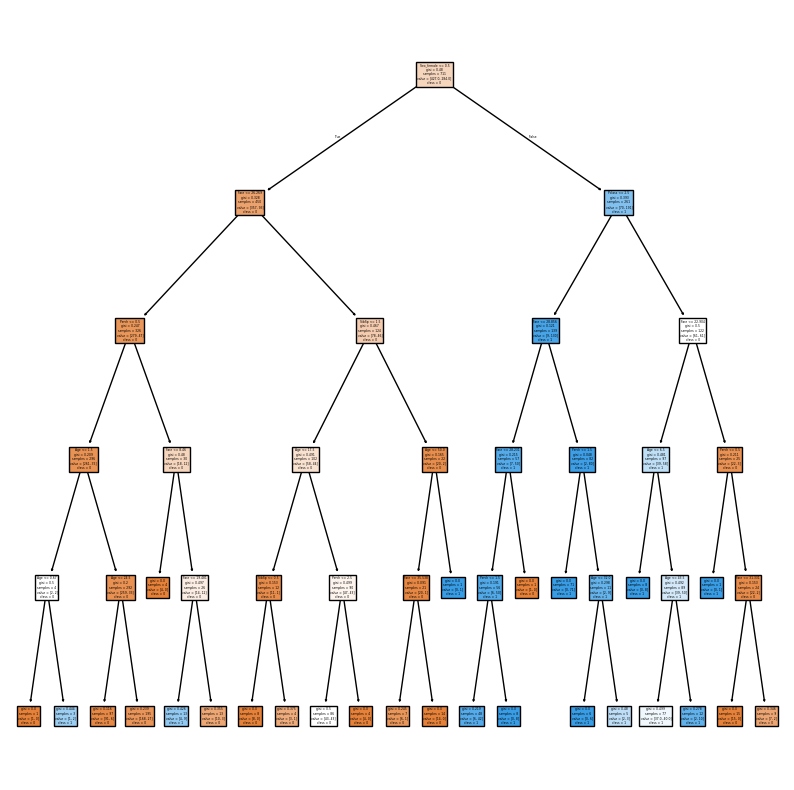

In [161]:
# Split the data into features and target
X = titanic_train_data.drop(columns=["Survived", "PassengerId"])
y = titanic_train_data['Survived']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=69)

# fit the model
clf.fit(X_train, y_train)

# Display the tree
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

### Accuracy Precision Recall and F1-Score

In [162]:

# Make predictions
y_pred = clf.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
# Evaluate performance
print(classification_report(y_test, y_pred))


Accuracy: 85.39%
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       122
           1       0.78      0.75      0.76        56

    accuracy                           0.85       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178



### Confusion Matrix

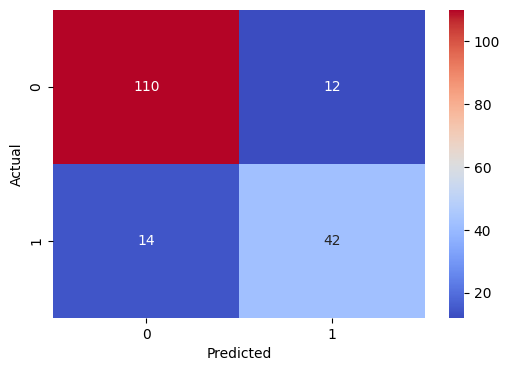

In [163]:

# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Detecting Overfitting
- We can see depth of 6 or 7 is optimalish

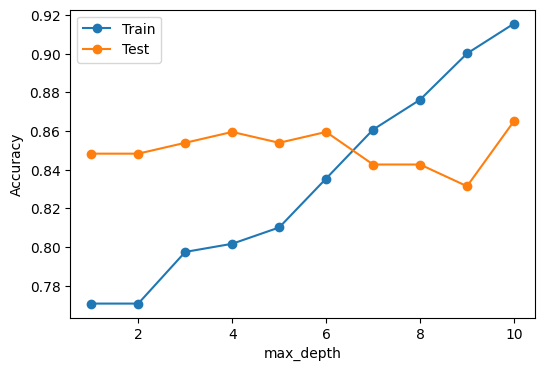

In [164]:

# Detecting overfitting
train_accuracy = []
test_accuracy = []

for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=69)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), train_accuracy, marker='o', label='Train')
plt.plot(range(1, 11), test_accuracy, marker='o', label='Test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### ROC AUC Score

ROC-AUC Score: 0.8258196721311475


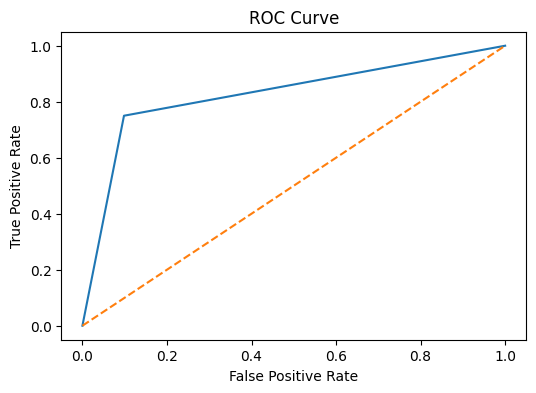

In [165]:

# ROC-AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

# ROC-AUC graph
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [166]:
from sklearn.model_selection import GridSearchCV

# Initialize the model
model = DecisionTreeClassifier(random_state=69)

# Define hyperparameters to tune
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best model
best_model = grid_search.best_estimator_

print(best_model)

# Make predictions
y_pred = best_model.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

DecisionTreeClassifier(max_depth=3, random_state=69)
Accuracy: 85.39%


##  Confusion matrix
- Analyzing which groups (men, women, children) the model 
struggles to predict correctly

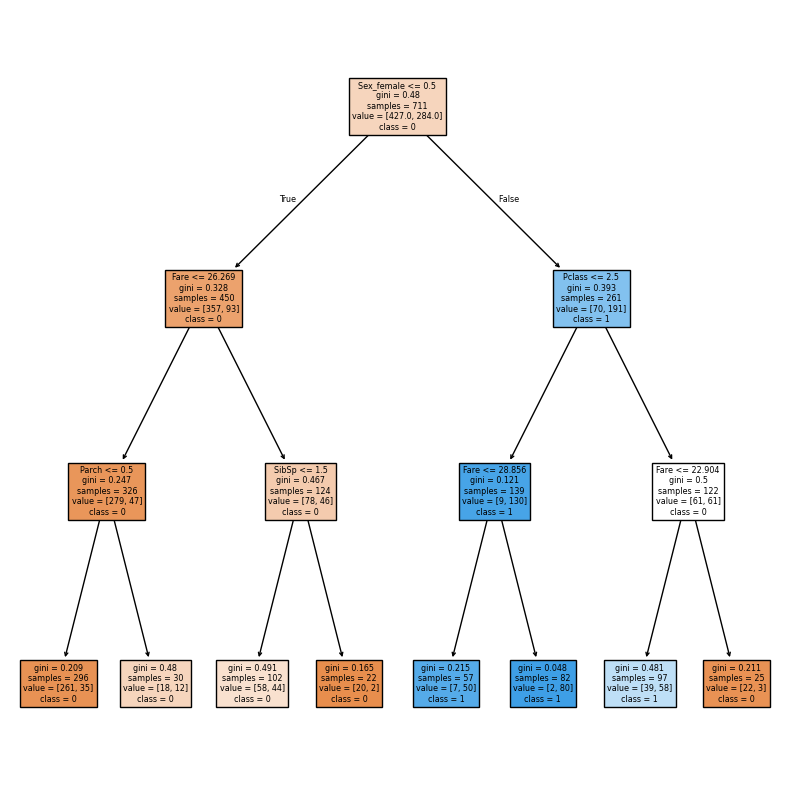

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the tree
plt.figure(figsize=(10, 10))
tree.plot_tree(best_model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

### For Men

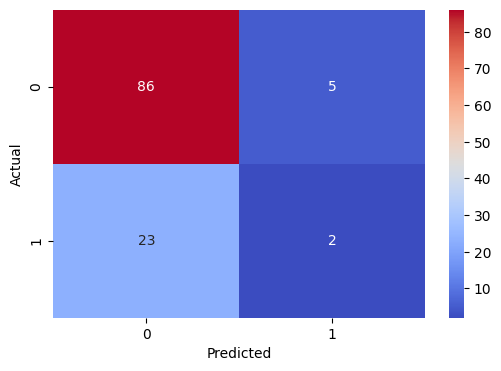

In [168]:
# Load dataset again
titanic_train_data = pd.read_csv('titanic/train.csv')

titanic_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values in Age Column according to the median
titanic_train_data["Age"] = (
    titanic_train_data.groupby(["Sex"])["Age"]
    .apply(lambda x: x.fillna(x.median()))
    .values
)

# Drop rows with missing values
titanic_train_data.dropna(inplace=True)


# only include rows where sex == male
titanic_train_data = titanic_train_data[titanic_train_data["Sex"] == "male"]

# One Hot Encoding Binary and Categorical Columns
titanic_train_data = pd.get_dummies(titanic_train_data, columns=["Sex", "Embarked"])

# Split the data into features and target
X = titanic_train_data.drop(columns=["Survived", "PassengerId"])
y = titanic_train_data['Survived']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# initialize the DecisionTreeClassifier
best_model = DecisionTreeClassifier(max_depth=5, random_state=69)

# fit the model
best_model.fit(X_train, y_train)

# Confusion Matrix
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### For Women

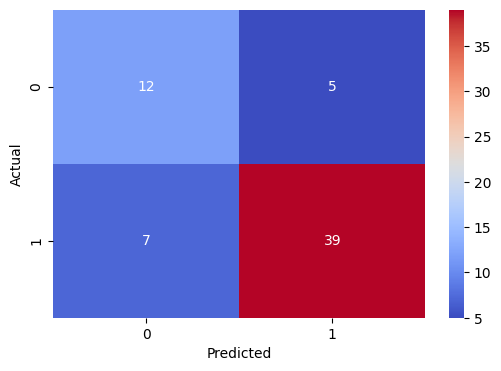

In [169]:
# Load dataset again
titanic_train_data = pd.read_csv('titanic/train.csv')

titanic_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values in Age Column according to the median
titanic_train_data["Age"] = (
    titanic_train_data.groupby(["Sex"])["Age"]
    .apply(lambda x: x.fillna(x.median()))
    .values
)

# Drop rows with missing values
titanic_train_data.dropna(inplace=True)


# only include rows where sex == male
titanic_train_data = titanic_train_data[titanic_train_data["Sex"] == "female"]

# One Hot Encoding Binary and Categorical Columns
titanic_train_data = pd.get_dummies(titanic_train_data, columns=["Sex", "Embarked"])

# Split the data into features and target
X = titanic_train_data.drop(columns=["Survived", "PassengerId"])
y = titanic_train_data['Survived']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# initialize the DecisionTreeClassifier
best_model = DecisionTreeClassifier(max_depth=5, random_state=69)

# fit the model
best_model.fit(X_train, y_train)

# Confusion Matrix
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### For Children

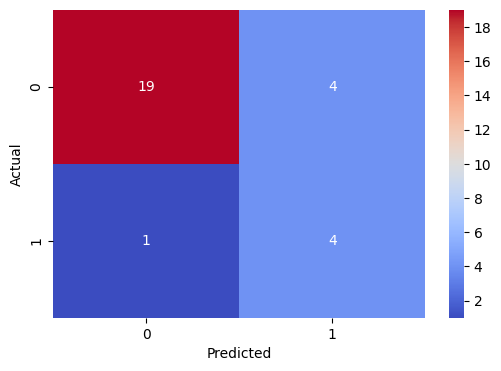

In [170]:
# Load dataset again
titanic_train_data = pd.read_csv('titanic/train.csv')

titanic_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values in Age Column according to the median
titanic_train_data["Age"] = (
    titanic_train_data.groupby(["Sex"])["Age"]
    .apply(lambda x: x.fillna(x.median()))
    .values
)

# Drop rows with missing values
titanic_train_data.dropna(inplace=True)


# only include rows where sex == male
titanic_train_data = titanic_train_data[titanic_train_data["Age"] < 19]

# One Hot Encoding Binary and Categorical Columns
titanic_train_data = pd.get_dummies(titanic_train_data, columns=["Sex", "Embarked"])

# Split the data into features and target
X = titanic_train_data.drop(columns=["Survived", "PassengerId"])
y = titanic_train_data['Survived']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# initialize the DecisionTreeClassifier
best_model = DecisionTreeClassifier(max_depth=5, random_state=69)

# fit the model
best_model.fit(X_train, y_train)

# Confusion Matrix
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()